<h1>Problema 4: Cáncer de seno</h1>
<p>Autor: Erick García Ramírez<br /> 
erick_phy@ciencias.unam.mx<br /> 
Curso de Aprendizaje Automatizado, MCIC 2019-2</p>

<h2>Introducción</h2>
<p> Buscamos entrenar dos clasificadores para predecir si un tumor, dada su lista de atributos, es maligno o benigno.  En este problema tenemos que lidiar con el desconocimiento de algunos valores de atributos. En el archivo <em>breast-cancer-winconsin.data</em> la ausencia del valor de un atributo se marca con '?'.  Ahondaremos más adelante en este problema; por el momento, basta mencionar brevemente dos propuestas para tratarlo:
<ol>
<li> Reemplazar cada atributo desconocido  por la media calculada sobre todos los valores de dicho atributo (promedio sobre la columna en la que está el valor desconocido). </li>
<li> Ignorar dichos casos. Esto esencialmente corresponde a reemplazar cada valor faltante por un 0.</li>
</ol>
    
Se usará la biblioteca scikit-learn para entrenar dos clasificadores, además de que usaremos las bibliotecas usuales (numpy y pandas). 

In [60]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import  BernoulliNB, GaussianNB, MultinomialNB
from sklearn.metrics import confusion_matrix

<p> En la siguiente celda cargamos los datos en <em>breast-cancer-winconsin.data</em> y presentamos los histogramas para cada uno de los 9 atributos de tumores. Dichos histogramas nos permiten observar que las distribuciones de los atributos no son simétricos, y que en general no siguen una distribución normal. De esta observación proponemos usar los clasificadores BernoulliNB y MultinomialNB (de scikit-learn) para el presente problema. En la opinión del autor, las distribuciones de los 9 atributos (quizás con excepción del segundo) parecen tener una distribución exponencial. Lamentablemente no encontramos alguna herramienta en scikit-learn para trabajar con dicha distribución (identificamos a expon de la librería scipy.stats, pero consideramos que su uso rebasaa el alcance y nivel de la presente tarea).

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f62a7aee588>,
      dtype=object)

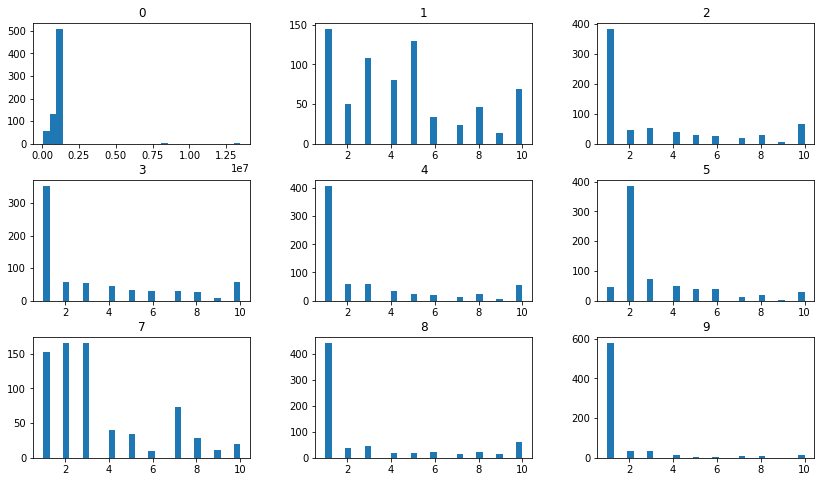

In [61]:
data = pd.read_csv("~/Desktop/mcc20192/mlearning/tareas/tarea2/nb_data/breast-cancer-wisconsin.data", header=None)
pd.DataFrame.hist(data.iloc[0:,:-1], grid=False,bins=30,figsize=(14,8))

Posteriormente, creamos el arreglo data_matrix con todos los valores de atributos y etiquetas. Seguidamente, con la función train_test_split partimos los datos en data_matrix en un conjunto de datos para entrenamiento (train_data) y otro de datos para validación (test_data). La proporción del primero contra el segundo es de 70% contra 30% de los datos totales.

In [62]:
data_matrix = data.values[0:,1:]

# Partición aleatoria del conjunto de datos, proporción 70% vs 30%
train_data, test_data= train_test_split(data_matrix, test_size=0.30, random_state=0)
# Imprimimos las cardinalidades de ambos conjuntos
print(len(train_data),len(test_data))

489 210


La primer función en la siguiente celda calcula las medias de cada columna de atributo en data_matrix, y la segunda función es una rutina para reemplazar las entradas desconocidas en una matriz.

In [63]:
# Calculo de las medias por columna d e una matriz
def vector_of_experimental_means(matrix):
    means = np.zeros(9)
    for j in range(0,9):
        known_count = 0
        s = 0    
        for i in range(0,len(matrix)):
            if matrix[i][j] != '?':
                s += int(matrix[i][j])
                known_count += 1
            means[j] = s/known_count
    return means

# Reemplazo de atributos desconocidos por los valores del vector v; v será el vector de medias o un vector con todas sus entradas = 0
def replace_unknown(matrix,v):
    for i in range(0,len(matrix)):
        for j in range(0,8):
            if matrix[i][j] == '?':
                matrix[i][j] = v[j]
    return matrix

A partir de este momento seguiremos la propuesta de sustituir un valor desconocido en la columna j por la media global de dicha columna. Así, primero calculamos el vector de medias globales (i.e. de data_matrix). Posteriormente, separamos el conjunto de entrenamiento en una matriz de atributos (train_matrix) y el vector correspondiente de etiquetas (train_labels). Hacemos lo análogo para el conjunto de validación.

In [64]:
# El vector de medias para data_matrix
means = vector_of_experimental_means(data_matrix[0:,0:-1])

# Preparación del conjunto de entrenamiento con reemplazo de atributos desconocidos por medias
train_matrix = replace_unknown(train_data[0:,0:-1],means)
train_labels = train_data[0:,-1]
train_labels=train_labels.astype('int')

# Preparación del conjunto de validación con reemplazo de atributos desconocidos por medias
test_matrix = replace_unknown(test_data[0:,0:-1],means)
test_labels = test_data[0:,-1]
test_labels=test_labels.astype('int')

<h1> Clasificadores y su entrenamiento </h1>
Ahora entrenamos los clasificadores propuestos, BernoulliNB y MultinomialNB. También entrenamos GaussianNB sólo para comparar; recuerde que le 
habíamos descartado ya que los atributos no parecen seguir una distribución gaussiana. Recuerde que por el momento hemos reemplazado los valores desconocidos de atributos por las medias.

In [65]:
# Proponemos los siguientes dos clasificadores
bernoulli_classifier = BernoulliNB(binarize = 1.0)
multinomial_classifier = MultinomialNB()

# Sugerimos GaussianNB para hacer comparaciones
normal_classifier = GaussianNB()

# Entrenamos los clasificadores
print(bernoulli_classifier.fit(train_matrix,train_labels))
print(multinomial_classifier.fit(train_matrix,train_labels))
print(normal_classifier.fit(train_matrix,train_labels))

BernoulliNB(alpha=1.0, binarize=1.0, class_prior=None, fit_prior=True)
MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)
GaussianNB(priors=None, var_smoothing=1e-09)


In [71]:
# FUNCIÓN AUXILIAR: tomada de  https://gist.github.com/zachguo/10296432
# Autor: zachguo
# Esta función sirve para imprimir la matriz de confusión
def print_cm(cm, labels, hide_zeroes=False, hide_diagonal=False, hide_threshold=None):
    columnwidth = max([len(x) for x in labels] + [5])  # 5 is value length
    empty_cell = " " * columnwidth
    # Print header
    print("    " + empty_cell, end=" ")
    for label in labels:
        print("%{0}s".format(columnwidth) % label, end=" ")
    print()
    # Print rows
    for i, label1 in enumerate(labels):
        print("    %{0}s".format(columnwidth) % label1, end=" ")
        for j in range(len(labels)):
            cell = "%{0}.1f".format(columnwidth) % cm[i, j]
            if hide_zeroes:
                cell = cell if float(cm[i, j]) != 0 else empty_cell
            if hide_diagonal:
                cell = cell if i != j else empty_cell
            if hide_threshold:
                cell = cell if cm[i, j] > hide_threshold else empty_cell
            print(cell, end=" ")
        print()
        
# FUNCIÓN AUXILIAR: Función para calcular el número de errores de clasificación
def classification_errors(predicted,real):
    s = 0
    for i in range(0,len(predicted)):
        if predicted[i] != real[i]:
            s += 1
    return s


<h1>Rendimiento</h1>
Ahora damos un vistazo al rendimiento de los clasificadores entrenados. En la celda debajo lo hacemos para el conjunto de datos de entrenamiento.

In [80]:
# Pruebas en el conjunto de entrenamiento
predict_train_bernoulli = bernoulli_classifier.predict(train_matrix)
predict_train_multinomial = multinomial_classifier.predict(train_matrix)
predict_train_normal = normal_classifier.predict(train_matrix)

print('SOBRE EL CONJUNTO DE ENTRENAMIENTO.')
# Desempeño de BernoulliNB
e=classification_errors(predict_train_bernoulli,train_labels)
print('Matriz de confusión para BernoulliNB:')
print_cm(confusion_matrix(predict_train_bernoulli, train_labels),['benigno','maligno'])
print('Número de errores para BernoulliNB:', e)
print('Porcentaje de aciertos:', round(100*(len(train_matrix)-e)/len(train_matrix),2))
print()
# Desempeño de MultinomialNB
print('Matriz de confusión para MutinomialNB:')
e=classification_errors(predict_train_multinomial,train_labels)
print_cm(confusion_matrix(predict_train_multinomial, train_labels),['benigno','maligno'])
print('Número de errores para MultinomialNB:', classification_errors(predict_train_multinomial,train_labels))
print('Porcentaje de aciertos:', round(100*(len(train_matrix)-e)/len(train_matrix),2))
print()
# Desempeño de GaussianNB
print('Matriz de confusión para GaussianNB:')
e=classification_errors(predict_train_normal,train_labels)
print_cm(confusion_matrix(predict_train_normal, train_labels),['benigno','maligno'])
print('Número de errores  para GaussianNB:', classification_errors(predict_train_normal,train_labels))
print('Porcentaje de aciertos:', round(100*(len(train_matrix)-e)/len(train_matrix),2))

SOBRE EL CONJUNTO DE ENTRENAMIENTO.
Matriz de confusión para BernoulliNB:
            benigno maligno 
    benigno   302.0     2.0 
    maligno    21.0   164.0 
Número de errores para BernoulliNB: 23
Porcentaje de aciertos: 95.3

Matriz de confusión para MutinomialNB:
            benigno maligno 
    benigno   305.0    33.0 
    maligno    18.0   133.0 
Número de errores para MultinomialNB: 51
Porcentaje de aciertos: 89.57

Matriz de confusión para GaussianNB:
            benigno maligno 
    benigno   311.0     1.0 
    maligno    12.0   165.0 
Número de errores  para GaussianNB: 13
Porcentaje de aciertos: 97.34


Ahora presentamos el rendimiento de los clasificadores sobre el conjunto de validación.

In [79]:
# Pruebas en el conjunto de validación
predict_test_bernoulli = bernoulli_classifier.predict(test_matrix)
predict_test_multinomial = multinomial_classifier.predict(test_matrix)
predict_test_normal = normal_classifier.predict(test_matrix)

print('SOBRE EL CONJUNTO DE VALIDACIÓN.')
# Desempeño de BernoulliNB
e=classification_errors(predict_test_bernoulli,test_labels)
print('Matriz de confusión para BernoulliNB:')
print_cm(confusion_matrix(predict_test_bernoulli, test_labels),['benigno','maligno'])
print('Número de errores para BernoulliNB:', e)
print('Porcentaje de aciertos:', round(100*(len(test_matrix)-e)/len(test_matrix),2))
print()
# Desempeño de MultinomialNB
print('Matriz de confusión para MutinomialNB:')
e=classification_errors(predict_test_multinomial,test_labels)
print_cm(confusion_matrix(predict_test_multinomial, test_labels),['benigno','maligno'])
print('Número de errores para MultinomialNB:', classification_errors(predict_test_multinomial,test_labels))
print('Porcentaje de aciertos:', round(100*(len(test_matrix)-e)/len(test_matrix),2))
print()
# Desempeño de GaussianNB
print('Matriz de confusión para GaussianNB:')
e=classification_errors(predict_test_normal,test_labels)
print_cm(confusion_matrix(predict_test_normal, test_labels),['benigno','maligno'])
print('Número de errores  para GaussianNB:', classification_errors(predict_test_normal,test_labels))
print('Porcentaje de aciertos:', round(100*(len(test_matrix)-e)/len(test_matrix),2))


SOBRE EL CONJUNTO DE VALIDACIÓN.
Matriz de confusión para BernoulliNB:
            benigno maligno 
    benigno   117.0     1.0 
    maligno    18.0    74.0 
Número de errores para BernoulliNB: 19
Porcentaje de aciertos: 90.95

Matriz de confusión para MutinomialNB:
            benigno maligno 
    benigno   123.0    16.0 
    maligno    12.0    59.0 
Número de errores para MultinomialNB: 28
Porcentaje de aciertos: 86.67

Matriz de confusión para GaussianNB:
            benigno maligno 
    benigno   125.0     3.0 
    maligno    10.0    72.0 
Número de errores  para GaussianNB: 13
Porcentaje de aciertos: 93.81


<h1>Conclusiones </h1>
Curiosamente, el clasificador GaussianNB tiene un mejor rendimiento que los otros dos. Entre los dos propuestos, BernoulliNB es mejor que MultinomialNB, con cerca de 5% más aciertos sobre ambos conjuntos de entrenamiento y de validación.

<h3> Reemplazo de valores desconocidos por 0's</h3>
Brevemente, ahora mencionamos qué pasa cuando reemplazamos por 0 los valores desconocidos. Tratamos con diferentes semillas (el valor de random_state en train_test_split(data_matrix, test_size=0.30, random_state=0)), es decir, con diferentes particiones de los datos, y no encontramos diferencias en el rendimiento de los clasificadores. Hay dos posibles razones para esto: a) los valores desconocidos son pocos y  por lo tanto no influyen, y/o b) como los valores desconocidos pertecen a la misma columna, es posible suponer que el atributo en esa columna no es significativo para la clasificación. 